<aside>
🧑🏻‍💻 В компании SkyCrossroads запущена рекламная акция:

Клиент может получить дополнительные баллы лояльности за покупку, совершенную в течение ограниченного периода.

Классическая акция подразумевает получение дополнительных 1000 баллов лояльности за покупку от 100 рублей. 

Было решено запустить АБ Тест, в котором в тестовой группе предлагается в два раза больше баллов лояльности за покупку от 100 рублей. 

Эксперимент был проведен в нескольких торговых точках, которые в датасете представлены столбцом id_point. Также в датасете есть информация о том, как долго клиент зарегистрирован у нас в программе лояльности.

Вам поступил запрос от отдела маркетинга:

- Рассчитать результаты эксперимента в целом и в отдельности по каждой торговой точке
- Вынести решение об эффективности воздействия Б по сравнению с воздействием А
- Сделать сегментацию пользователей с точки зрения длительности регистрации в программе лояльности
</aside>

### Задача 1.1
Постройте в Python функцию **statistical_analysis**, которая будет проводить анализ выборки. 

**На вход она берет:**
- один ряд ***r*** в формате «список» (*list*) или «кортеж» (*tuple*). Это ряд, который необходимо исследовать.
- один ряд ***q*** в формате «список» (*list*). Это ряд квантильных порогов, для которых необходимо вычислить квантильные значения ряда ***r***. Аргумент ***q*** должен иметь значение по умолчанию *q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]* (но при желании значение ряда ***q*** можно было бы заменить)

**И делает следующие шаги:**
1. Проводит проверку на тип данных ряда : если тип данных ряда ***r*** не «список» (*list*) или «кортеж» (*tuple*), то выводит ошибку «Нужен список или кортеж!»  
2. Проводит проверку на длину ряда ***r***: если в нём 4 наблюдения или меньше, то выдает ошибку «Требуется более длинный ряд».
3. Проводит преобразование типа данных «список» (*list*) или «кортеж» (*tuple*) в тип данных Series (*pandas*).
4. Для ряда выводит (с помощью *print* и расшифровки) среднее (метод Series “*mean*”), дисперсию (метод Series “*var*”), стандартное отклонение (метод Series “*std*”). Также записывает эти значения во внутренние переменные и возвращает эти переменные в *return*.   
5. С помощью функции *quantile* из библиотеки *numpy* функция рассчитывает и записывает в отдельную переменную ***qs*** список из квантилей, соответствующих квантильным порогам из ***q***. 
Ряд ***qs*** также должен быть в return функции (вместе со средним, дисперсией и стандартным отклонением из пункта-4).
6. Оформляет принт результатов квантильного анализа. Для этого необходимо проверить, есть ли среди указанных в аргументе квантильных порогов те, что соответствуют ***медиане***, ***квартилям*** или ***децилям***. Если такие квантильные пороги есть, то для каждого из них оформите print с указанием квантильного порога и его значения.
7. Для ряда функции **statistical_analysis** строит гистограмму с помощью библиотеки *seaborn*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #скачиваем библиотеку для гистограммы

from scipy.stats import ttest_ind # загружаем титест
from scipy.stats import mannwhitneyu # загружаем маннуитни
from scipy import stats as st
from datetime import datetime

In [2]:
# пишем функцию, которая будет проводить анализ выборки на наличие выбросов (с учетом замечаний наставника)
def statistical_analysis(r,q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):
    if type(r) != list and type(r) != tuple: # проверка на тип данных ряда r 
         return ('Нужен список или кортеж !')  #Задание 1
            #return 
    elif len(r) <= 4:
         return ('Требуется более длинный ряд!') #Задание 2
#            return
  
    r = pd.Series(r) #Задание 3 Проводит преобр. типа данных «список» (*list*) или «кортеж» (*tuple*) в тип данных Series (*pandas*)
    r_mean = r.mean()  # считаем среднюю
    r_var = r.var() #считаем дисперсию
    r_std = r.std() #считаем стандарт.отклонение
    print('Среднее = ', r_mean,'\n','Дисперсия = ', r_var,'\n','Станд. отклонение = ',r_std) #Задание 1.4
    
    qs = np.quantile(r,q) #Задание 1.5
#     print(qs)
    for i in range(len(q)): #Задание 1.6
        if q[i] == 0.5:
            print('Медиана (', q[i],') = ', qs[i])
        elif q[i] in (0.25, 0.75):
            print('Квартиль (', q[i],') = ', qs[i])
        elif q[i] in (0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9):
            print('Дециль (', q[i],') = ', qs[i])
    
    plt.figure()   #Задание 1.7

    plt.title('statistical_analysis')
    sns.histplot(r, color = 'r')
    plt.grid(alpha = 0.3)
    plt.show()
    
    return

### Задача 1.2
Постройте в Python функцию ***test_calc***, которая будет проводить t-тест на равенство средних двух выборок. 

**На вход она берет:**

- Ряд 1 (***r1***)

- Ряд 2 (***r2***)

- Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)

**И делает следующие шаги:**

1. Вычисляет значение *t-критерия* и его *p_value* по сравнению средних значений рядов ***r1*** и ***r2.*** 
Лучше всего воспользоваться функцией *ttest_ind* из библиотеки *scipy.stats.* Эти значения сохраняются 
во внутренние переменные (значение t-критерия в переменную ***s,*** p_value в переменную ***p***).

2. Возвращает (*return*) переменные ***s*** и ***p***.

3. Оформляет принт результатов, принимается ли нулевая гипотеза о равенстве средних или нет 
на основании сравнения полученного *p_value* (переменная ***р***) и аргумента ***alpha.***

In [3]:
###  Задача 2 - создаем функцию для проведения t-теста на равенство средних двух выборок 

def test_calc(r1, r2, alpha = 0.05):
    s, p = ttest_ind(r1, r2) #считаем стат.параметры в двух группах по сумме оплат
    if p < alpha:
        print('Нулева гипотеза о равенстве средних НЕ принимается (средние значения НЕ равны)')
    else:
        print('Нулевая гипотеза о равенстве средних принимается (средние значения в выборках равны)')
    return s, p   

### Задача 1.3
Постройте в Python функцию **mann_whitney_func**, которая будет проводить тест Манна-Уитни для двух выборок.

**На вход она берет:**
- Ряд 1 (***r1***)
- Ряд 2 (***r2***)
- Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)

**И делает следующие шаги:**
1. Вычисляет значение статистики Манна — Уитни и p_value нулевой гипотезы теста Манна-Уитни. 
Значение статистики записывается во внутреннюю переменную ***s***, а *p_value* - во внутреннюю переменную ***p***.
2. Принт результата в зависимости от соотношения p_value и alpha («Распределения (не) равны»).
3. Возвращает (в *return*) — внутренние переменные ***s*** и ***p***.

In [4]:
### задача 3 - создаем функцию для проведения теста Манна-Уитни для двух выборок

def mann_whitney_func (r1, r2, alpha = 0.05):
    s, p = mannwhitneyu(r1, r2) # проводим тест Манна-Уитни
    if p < alpha:
        print('распределения НЕ равны')
    else:
        print('распределения равны')
    return s, p    

## Задача 2.1
Проведите общий анализ A/B Теста
1.	С помощью функции read-csv импортните csv файл с датасетом.
2.	Исследуйте данные. Проведите очистку данных от нуллов и выбросов (для очистки от выбросов используйте созданную в первом шаге функцию **statistical_analysis**).
3.	Создайте функцию для визуализации **show_hist**, которая имеет следующие аргументы:
-	r1 (первый ряд для визуализации)
-	r2 (второй ряд для визуализации)
-	graph_title (Строка-название графика)
-	xlabel (подпись оси Х с дефолтным значением “Размер платежа”)
-	ylabel (подпись оси Y с дефолтным значением “Кол-во людей”)
Функция должна с помощью библиотеки seaborn строить гистограмму для каждого из рядов (вместе на одном графике) и подписывать график (graph_titile) и оси (xlabel, ylabel).
4.	Проведите визуализацию с помощью функции **show_hist** для сравнения результатов в А и В группе.
5.	Посмотрите на результаты параметрического и непараметрического теста (используйте созданные в первой шаге функции mann_whitney_func и test_calc).
6.	Сделайте выводы.


In [5]:
df = pd.read_csv('Dataset_AB_TEST.csv', sep=';') # sep - указываю символ, кот. применяю как резделитель при переводе csv в exsel
df.head(5)

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


In [6]:
df.isnull().sum()   # проверяем нуллы и их количество

id_client       0
id_group       74
sum_pay       127
id_point       81
months_reg      0
dtype: int64

In [7]:
df.dropna(inplace=True)       #удаляем строчки с пустыми значениями
# второй вариант - переписать датафрейм df = df.dropna()
df.head(5)

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


In [8]:
#df = df.loc[df.sum_pay > 100] 
#убираем все строки где платежи меньше 100 руб(т.к. такие платежи не проходят по условиям акции)

In [9]:
#df.info()    #проверяем, все ли ок удалилось

In [10]:
# проверяем выбросы по колонке sum_pay применив функцию statistical_analysis
statistical_analysis(df.sum_pay,q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9])

'Нужен список или кортеж !'

#### видим выбросы в  платежах в промежутке 20000-25000 

убираем их

In [11]:
df_clear1 = df.loc[df.sum_pay < 12000]
df_clear1.info() # проверяем, уменьшилось ли кол-во строк

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10761 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10761 non-null  int64  
 1   id_group    10761 non-null  object 
 2   sum_pay     10761 non-null  float64
 3   id_point    10761 non-null  float64
 4   months_reg  10761 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 504.4+ KB


In [12]:
df_gr = df_clear1.groupby(['id_group','id_point']).count() #смотрим в разрезе групп и торговых точек
df_gr

id_client  sum_pay  months_reg
id_group id_point                                
control  1178.0         2403     2403        2403
         1179.0         1697     1697        1697
         1182.0         1012     1012        1012
         1186.0           23       23          23
         1188.0            5        5           5
test     1178.0         2406     2406        2406
         1179.0         1745     1745        1745
         1182.0          950      950         950
         1186.0           40       40          40
         1188.0            4        4           4
         1199.0          476      476         476

После данной группировки мы увидели, что для торговой точки 1199 нет контрольной группы. Следовательно тест группу торговой точки 1199 необходимо удалить.

In [13]:
# удаляем торговую точку под номером 1199
#df_clear2 = df_clear1.loc[df_clear1['id_point'] != 1199.0]
#df_clear2.info()


В итоге получаем очищенные данные, в которых тестовая группа и контрольная группа есть во всех торговых точках. Теперь с такими данными можно работать и проводить тесты.

In [14]:
#создаем функцию для визуализации
def show_hist (r1, r2, graph_title = '', xlabel = 'Размер платежа', ylabel = 'Кол-во людей'):
    plt.figure(figsize=(5,3))
    
    sns.histplot(r1, color = 'blue', alpha = 0.25, label = 'control')
    sns.histplot(r2, color = 'red', alpha = 0.5, label = 'test')               
   
    plt.xlabel('Размер платежа')
    plt.ylabel('Кол-во людей')
    plt.title('graph_title')  
    plt.legend(loc = 'upper right')

    plt.grid(alpha = 0.3)
    plt.show()
    
    return

In [15]:
r1 = df_clear1[df_clear1['id_group'] == 'control']['sum_pay'] # создаем новую серию control
r2 = df_clear1[df_clear1['id_group'] == 'test']['sum_pay'] # создаем новую серию test

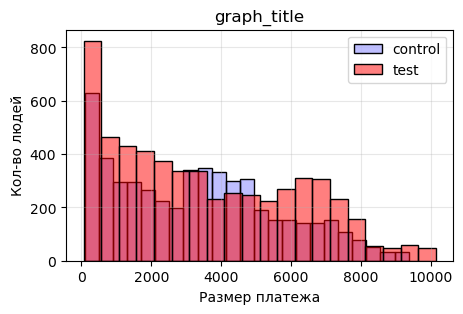

In [16]:
show_hist(r1, r2)

In [17]:
test_calc(r1, r2)      # проводим t-test

Нулева гипотеза о равенстве средних НЕ принимается (средние значения НЕ равны)


(-3.7141912292177888, 0.0002048855494553075)

In [18]:
mann_whitney_func(r1, r2)    # проводим тест Манна -Уитни

распределения равны


(14141330.5, 0.05842125879702285)

## Задача 2.2

Анализ по торговым точкам
1.	Создайте цикл, пробегающий по всем уникальным торговым точкам.
2.	Для каждой торговой точки проведите визуализацию с помощью гистограммы для сравнения результатов в А и В группе (используйте функцию **show_hist**).
3.	Для каждой торговой точки посмотрите на результаты параметрического и непараметрического теста для сравнения групп А и В (используйте функции **mann_whitney_func** и **test_calc**).
4.	Убедитесь, что в торговых точках, по которым вы делаете выводы, достаточное количество наблюдений.
5.	Для каждой торговой точки с достаточным количеством наблюдений сделайте выводы.


In [19]:
r11 = df_clear1[df_clear1['id_group']=='test']
r22 = df_clear1[df_clear1['id_group']=='control']

Торговая точка -  1199.0
Недостаточно наблюдений что бы считать статистику

Торговая точка -  1182.0


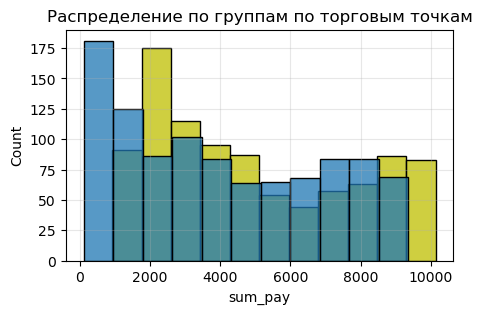

Нулева гипотеза о равенстве средних НЕ принимается (средние значения НЕ равны)
распределения НЕ равны


4945.12947368421
4036.9426877470355


Торговая точка -  1178.0


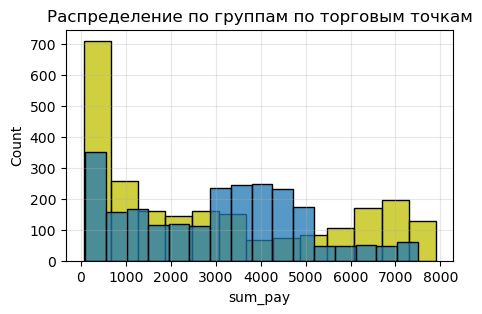

Нулевая гипотеза о равенстве средних принимается (средние значения в выборках равны)
распределения НЕ равны


2936.386949293433
3036.214731585518


Торговая точка -  1179.0


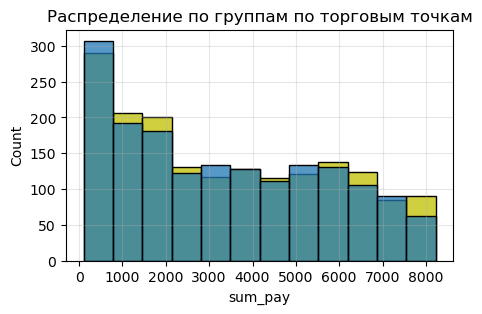

Нулевая гипотеза о равенстве средних принимается (средние значения в выборках равны)
распределения равны


3421.826934097421
3331.3105480259283


Торговая точка -  1186.0


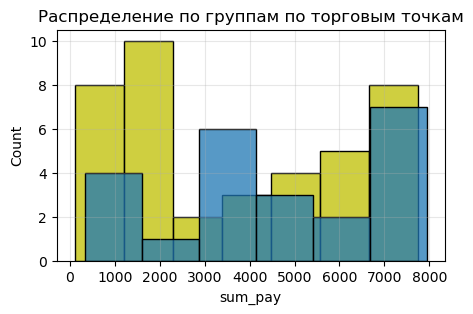

Нулевая гипотеза о равенстве средних принимается (средние значения в выборках равны)
распределения равны


3638.4
4546.0


Торговая точка -  1188.0


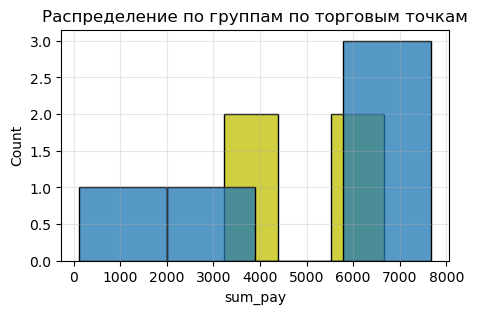

Нулевая гипотеза о равенстве средних принимается (средние значения в выборках равны)
распределения равны


4946.0
5202.0




In [20]:
for i in df_clear1['id_point'].unique():               #бежим по торговой точке и сразу в одном цикле:
    print('Торговая точка - ', i)
    
    if i == 1199:      #т.к. в точке 1199 нет контрольной группы - отсеиваем ее и статистику не считаем
        print('Недостаточно наблюдений что бы считать статистику\n')
        continue
        
    plt.figure(figsize=(5,3))                #строим гистограммы по точкам и сумме
    plt.title('Распределение по группам по торговым точкам')
    plt.grid(alpha = 0.3)
    sns.histplot(r11.loc[r11['id_point'] == i]['sum_pay'], color = 'y')  #чтобы отдельный датафрейм по точкам используем.loc
    sns.histplot(r22.loc[r22['id_point'] == i]['sum_pay'])
    plt.show()
    
    test_calc(r11.loc[r11['id_point'] == i]['sum_pay'], r22.loc[r22['id_point'] == i]['sum_pay'])              #проводим тесты
    mann_whitney_func(r11.loc[r11['id_point'] == i]['sum_pay'], r22.loc[r22['id_point'] == i]['sum_pay'])
    
    print('\n')
    
    print(r11.loc[r11['id_point'] == i]['sum_pay'].mean())    #выводим средние значение в контрольной группе для торг.точке в отдельности 
    print(r22.loc[r22['id_point'] == i]['sum_pay'].mean())    #выводим средние значение в тестовой группе для торг.точке в отдельности 
    
    print()
    print()

Торговая точка -  1199.0
Недостаточно наблюдений что бы считать статистику

Торговая точка -  1182.0


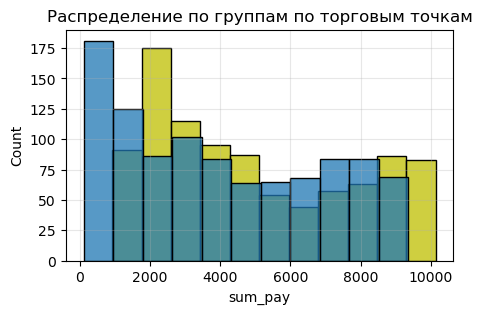

Нулева гипотеза о равенстве средних НЕ принимается (средние значения НЕ равны)
распределения НЕ равны


4945.12947368421
4036.9426877470355


Торговая точка -  1178.0


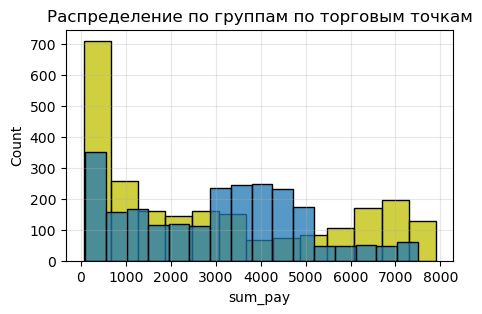

Нулевая гипотеза о равенстве средних принимается (средние значения в выборках равны)
распределения НЕ равны


2936.386949293433
3036.214731585518


Торговая точка -  1179.0


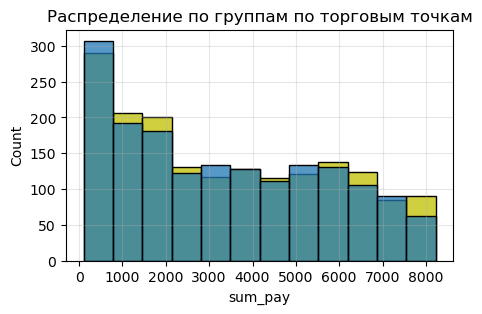

Нулевая гипотеза о равенстве средних принимается (средние значения в выборках равны)
распределения равны


3421.826934097421
3331.3105480259283


Торговая точка -  1186.0
Недостаточно наблюдений что бы считать статистику

Торговая точка -  1188.0
Недостаточно наблюдений что бы считать статистику



In [25]:
for i in df_clear1['id_point'].unique():               #бежим по торговой точке и сразу в одном цикле:
    print('Торговая точка - ', i)
    df_=df_clear1[df_clear1['id_point']==i]
    test_size = df_[df_['id_group']=='test'].shape[0]
    control_size = df_[df_['id_group']=='control'].shape[0]
    
    if (control_size <100) or (test_size <100):      # отсеиваем точки с малым количеством наблюдений
        print('Недостаточно наблюдений что бы считать статистику\n')
        continue
        
    plt.figure(figsize=(5,3))                #строим гистограммы по точкам и сумме
    plt.title('Распределение по группам по торговым точкам')
    plt.grid(alpha = 0.3)
    sns.histplot(r11.loc[r11['id_point'] == i]['sum_pay'], color = 'y')  #чтобы отдельный датафрейм по точкам используем.loc
    sns.histplot(r22.loc[r22['id_point'] == i]['sum_pay'])
    plt.show()
    
    test_calc(r11.loc[r11['id_point'] == i]['sum_pay'], r22.loc[r22['id_point'] == i]['sum_pay'])              #проводим тесты
    mann_whitney_func(r11.loc[r11['id_point'] == i]['sum_pay'], r22.loc[r22['id_point'] == i]['sum_pay'])
    
    print('\n')
    
    print(r11.loc[r11['id_point'] == i]['sum_pay'].mean())    #выводим средние значение в контрольной группе для торг.точке в отдельности 
    print(r22.loc[r22['id_point'] == i]['sum_pay'].mean())    #выводим средние значение в тестовой группе для торг.точке в отдельности 
    
    print()
    print()

### Задача 3.1

**Сегментация по длительности регистрации**

1. Рассмотрите два вида корреляции между выплаченной суммой и длительностью регистрации (корреляция Спирмена и корреляция Пирсона).
2. Постройте **scatterplot** (из библиотеки **seaborn**) для визуализации связи между переменными
3. Как полученные результаты повлияют на ваши бизнес-рекомендации?

In [22]:
# сравниваем корреляции между суммой и длительностью регистрации 

def proxi_ranges(r1, r2, alpha=0.05):
    
    
    pearson_v, pearson_p = st.pearsonr(r1, r2)
    spearman_v, spearman_p = st.spearmanr(r1, r2)
    
    print(pearson_v,',',pearson_p)
    print(spearman_v,',',spearman_p)
    
    if pearson_p < alpha:
        if abs(pearson_v )< 0.3:
            pearson_resolution = 'Слабая'
        elif abs(pearson_v )< 0.7:
            pearson_resolution = 'Средняя'
        else: pearson_resolution = 'Сильная'
        
        print('Корреляция Пирсона:',pearson_resolution)
    
    if spearman_p < alpha:
        if abs(spearman_v )< 0.3:
            spearman_resolution = 'Слабая'
        elif abs(spearman_v )< 0.7:
            spearman_resolution = 'Средняя'
        else: spearman_resolution = 'Сильная'
        
        print('Корреляция Спирмана:',spearman_resolution)
    
    
    print()

In [23]:
proxi_ranges(df_clear1['sum_pay'], df_clear1['months_reg'], alpha=0.05)

0.5982762521330335 , 0.0
0.6520008575703581 , 0.0
Корреляция Пирсона: Средняя
Корреляция Спирмана: Средняя



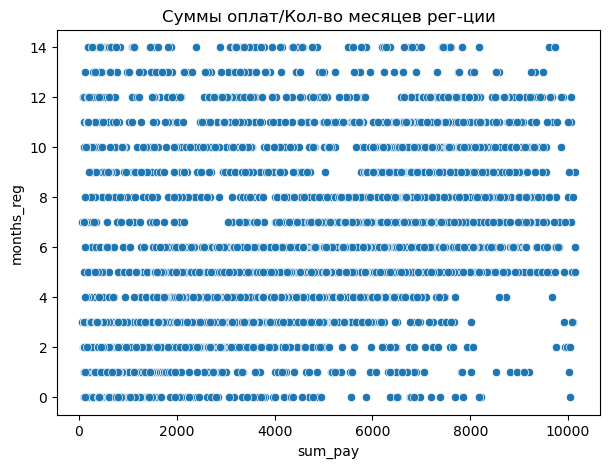

In [24]:
plt.figure(figsize=(7,5))

plt.title('Суммы оплат/Кол-во месяцев рег-ции') 

sns.scatterplot(x=df_clear1['sum_pay'],y=df_clear1['months_reg']) 
# строитм зависимость дней от оплат (каждый платеж отражен отдельной точкой)
plt.show() 

**Выводы //НАДО КОРРЕКТИРОВАТЬ//**

При анализе тестовых и контрольных групп в целом, независимо от точек продаж, можно сделать вывод, что средние значения по выборкам не равны, но распределения совокупностей равны.

При проведении аналиа по торговым точкам приходим к слелующим выводам:

**точка 1199**
недостаточно наблюдений для подсчета статистики

**точка 1182**
средние значения не равны и распределения не равны

**точка 1178**
средние значения двух выборок равны, распределения в выборках не равны

**точки 1186 и 1188**
средние значения двух выборок равны, распределения в выборках равны.

В точках 1182 и 1178 возможность получить удвоенное количество баллов не повлияла на рост объема продаж, чего не скажешь о точках 1186 и 1188.

В целом,  рост продаж наблюдается у клиентов, зарегистрированных в программе лояльности 5-8 месяцев.
